In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('./Description_Extracted.csv')
df = df.iloc[:,4:]

df = df.replace(False, 0).replace(True, 1)

df['Bedrooms'] = np.where(df['Bedrooms'].isnull(), df['Bedrooms'].mode(), df['Bedrooms'])
df['Bathrooms'] = np.where(df['Bathrooms'].isnull(), df['Bathrooms'].mode(), df['Bathrooms'])
df['Date']  = pd.to_datetime(df['Date'].str[11:])
df['MatchedDistricts'] = df['MatchedDistricts'].str.replace(', ', '_')
# df = df.sort_values('MatchedDistricts')
# df['Lat'] = df['Lat'].fillna(method = 'bfill')
# df['Lon'] = df['Lon'].fillna(method = 'bfill')

df['Lat'] = df['Lat'] -  df['Lat'].mean()
df['Lon'] = df['Lon'] -  df['Lon'].mean()
df['distance'] = np.sqrt(df['Lat']**2 + df['Lon']**2)*1000
df['distance'] = df['distance'].fillna(df['distance'].mean())

df = df[df['Price'].notnull()]
mask = df['Price'] < 1e9
df = df[mask]
X = pd.get_dummies(df.drop(['Location', 'Description', 'Date', 'Lat', 'Lon', 'Price'], axis = 1))
y = df['Price']


In [6]:
df.to_csv('render.csv', index = None)

# Lasso回归

In [7]:
lasso = Lasso()
grid_params = {'alpha': np.logspace(-3, 5, 9)}
gridCV = GridSearchCV(lasso, grid_params, cv = 5)
gridCV.fit(X, y )
best_lasso = gridCV.best_estimator_
y_pred = best_lasso.predict(X)
lasso_pred = best_lasso.predict(X)
r2 = best_lasso.score(X, y)
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = mse**0.5
print('R-square :', r2)
print('RMSE :', rmse)
print('MAE :', mae)


R-square : 0.5264737904626441
RMSE : 38735022.43714526
MAE : 21711110.303597905


In [8]:
best_lasso.alpha

100000.0

In [9]:
lasso_coef_df = pd.DataFrame({'feature':X.columns ,'Lasso_coef': best_lasso.coef_ })
lasso_coef_df = lasso_coef_df.append({ 'feature':'intercept', 'Lasso_coef':best_lasso.intercept_ }, 
                                     ignore_index = True)

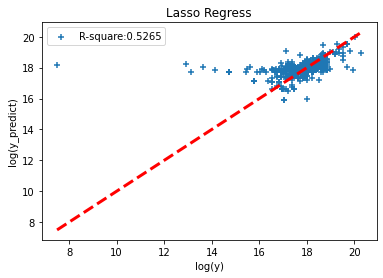

In [10]:
plt.scatter(np.log(y), np.log(y_pred), marker = '+', label = 'R-square:{:.4f}'.format(r2))
plt.plot([min(np.log(y)), max(np.log(y))], [min(np.log(y)), max(np.log(y))], 'r--',linewidth = 3)
plt.ylabel('log(y_predict)')
plt.xlabel('log(y)')
plt.title('Lasso Regress')
plt.legend()
plt.show()

# ridge regression

In [11]:
ridge = Ridge()
grid_params = {'alpha': np.logspace(-3, 5, 9)}
gridCV = GridSearchCV(ridge, grid_params, cv = 5)
gridCV.fit(X, y )
best_ridge = gridCV.best_estimator_
y_pred = best_ridge.predict(X)
ridge_pred = best_ridge.predict(X)
r2 = best_ridge.score(X, y)
mse = mean_squared_error(y,y_pred)
mae = mean_absolute_error(y,y_pred)
rmse = mse**0.5
print('R-square :', r2)
print('RMSE :', rmse)
print('MAE :', mae)

R-square : 0.5364758358747028
RMSE : 38323749.30247898
MAE : 21127335.288648695


In [12]:
best_ridge.alpha

0.1

In [13]:
ridge_coef_df = pd.DataFrame({'feature':X.columns ,'Ridge_coef': best_ridge.coef_ })
ridge_coef_df = ridge_coef_df.append({ 'feature':'intercept', 'Ridge_coef':best_lasso.intercept_ }, 
                                     ignore_index = True)

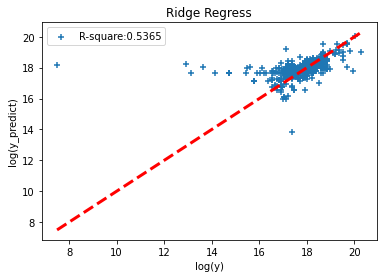

In [14]:
plt.scatter(np.log(y), np.log(y_pred), marker = '+', label = 'R-square:{:.4f}'.format(r2))
plt.plot([min(np.log(y)), max(np.log(y))], [min(np.log(y)), max(np.log(y))], 'r--',linewidth = 3)
plt.ylabel('log(y_predict)')
plt.xlabel('log(y)')
plt.title('Ridge Regress')
plt.legend()
plt.show()

# coef summary

In [15]:
coef_df = pd.merge(lasso_coef_df, ridge_coef_df)
coef_df

,feature,Lasso_coef,Ridge_coef
0,Bedrooms,2.084930e+07,1.984448e+07
1,Bathrooms,1.518705e+07,1.486072e+07
2,Apartment,1.192853e+08,1.314969e+08
3,WaterTank,1.141885e+07,1.166665e+07
4,distance,-3.330505e+04,-5.340920e+04
5,MatchedDistricts_GACURIRO_Rwanda,3.831727e+07,3.581308e+07
6,MatchedDistricts_GASABO_Rwanda,-4.452274e+06,-1.757410e+07
7,MatchedDistricts_GASOGI_Rwanda,-1.044572e+06,-4.105048e+07
8,MatchedDistricts_GATENGA_Rwanda,-0.000000e+00,-1.304941e+07
9,MatchedDistricts_GIKONDO_Rwanda,-4.552458e+06,-1.476444e+07


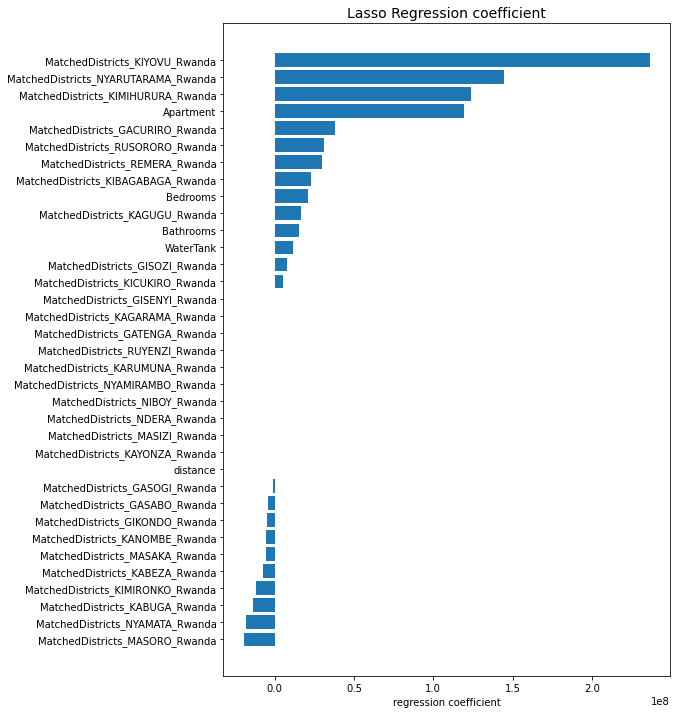

In [16]:
temp_df = coef_df.head(35)
temp_df = temp_df.sort_values('Lasso_coef')
plt.figure(figsize = (8,12))
plt.barh( temp_df['feature'], temp_df['Lasso_coef'])
plt.xlabel('regression coefficient')
plt.title('Lasso Regression coefficient', fontsize = 14)
plt.show()

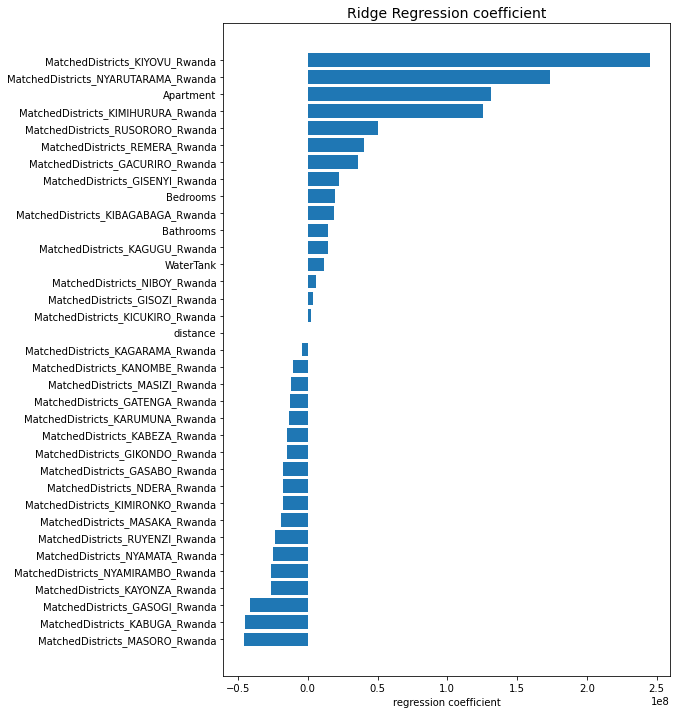

In [17]:
temp_df = coef_df.head(35)
temp_df = temp_df.sort_values('Ridge_coef')
plt.figure(figsize = (8,12))
plt.barh( temp_df['feature'], temp_df['Ridge_coef'])
plt.xlabel('regression coefficient')
plt.title('Ridge Regression coefficient', fontsize = 14)
plt.show()

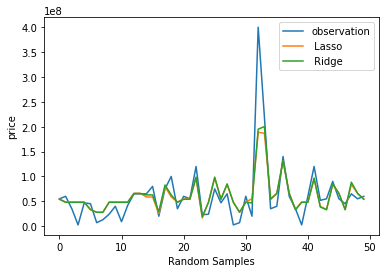

In [18]:
n = 50
plt.plot(range(n), y.head(n), label = 'observation',)
plt.plot(range(n), lasso_pred[:n], label=' Lasso')
plt.plot(range(n), ridge_pred[:n], label=' Ridge')
plt.ylabel('price')
plt.xlabel('Random Samples')
plt.legend()
plt.show()

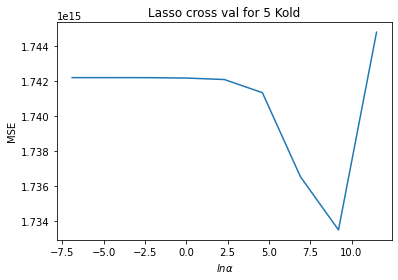

In [38]:
from sklearn.model_selection import cross_val_predict
alphas = np.logspace(-3, 5, 9)
lasso_mses = []
for alpha in alphas:
    lasso = Lasso(alpha)
    y_pred = cross_val_predict(lasso, X,y)
    mse = mean_squared_error(y,y_pred)
    lasso_mses.append(mse)

plt.plot(np.log(alphas), lasso_mses)
plt.xlabel("$ln{\\alpha}$")
plt.ylabel('MSE')
plt.title('Lasso cross val for 5 Kold')
plt.show()

## Ridge

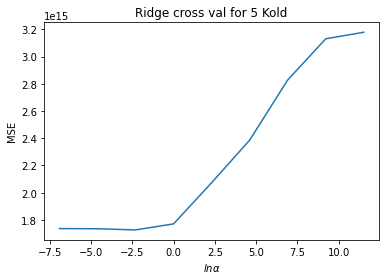

In [39]:
alphas = np.logspace(-3, 5, 9)
ridge_mses = []
for alpha in alphas:
    ridge = Ridge(alpha)
    y_pred = cross_val_predict(ridge, X,y)
    mse = mean_squared_error(y,y_pred)
    ridge_mses.append(mse)

plt.plot(np.log(alphas), ridge_mses)
plt.xlabel("$ln{\\alpha}$")
plt.ylabel('MSE')
plt.title('Ridge cross val for 5 Kold')
plt.show()